In [2]:
%pip install --upgrade tensorflow


Note: you may need to restart the kernel to use updated packages.


In [3]:
%pip install sklearn numpy matplotlib

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for sklearn: filename=sklearn-0.0.post4-py3-none-any.whl size=2360 sha256=e65355629554e12da48ed44872c5a1299fcfe6d81828487cd71496f02c29f69e
  Stored in directory: c:\users\claur\appdata\local\pip\cache\wheels\d5\b2\a9\590d15767d34955f20a9a033e8db973b79cb5672d95790c0a9
Successfully built sklearn
Note: you may need to restart the kernel to use updated packages.


In [4]:
%pip install keras

Note: you may need to restart the kernel to use updated packages.


In [1]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.datasets import mnist
from tensorflow.keras import backend as K
import matplotlib.pyplot as plt
import numpy as np

In [2]:
print('[INFO] accessing MNIST...')
((trainX, trainY), (testX, testY)) = mnist.load_data()

[INFO] accessing MNIST...


In [3]:
trainX = trainX.reshape((trainX.shape[0], 28 * 28 * 1))
testX = testX.reshape((testX.shape[0], 28 * 28 * 1))
trainX = trainX.astype('float32') / 255.0
testX = testX.astype('float32') / 255.0

In [4]:
lb = LabelBinarizer()
trainY = lb.fit_transform(trainY)
testY = lb.transform(testY)

Como podemos ver, a arquitetura segue o seguinte formato: uma camada de entrada de 784 nós, um para cada pixel da imagem em questão, que se conectará a uma camada oculta densa de 256 nós, pela função de ativação da sigmoide. Depois, a primeira camada oculta se conectará à segunda de 128 nós, também por sigmoide. Esta se conectará à última camada de predição, com 10 nós conectados a partir da Softmax. São 10 porque temos 10 possíveis dígitos.

Para treinar o modelo, usaremos como otimizador do gradiente, o SGD, aquele baseado no gradiente descendente, com taxa de aprendizado 0.01. Utilizaremos a métrica de acurácia para acompanhar o modelo e, para calcular a perda, função de custo, usaremos a entropia cruzada categórica (categorical_crossentropy), que é a mais empregada em problemas de classificação. Para as épocas da nossa rede, escolheremos 100 épocas, ou seja, a rede tem 100 iterações para convergir e apreender, e apresentaremos lotes de 128 imagens cada por iteração. Para isso, utilizaremos o seguinte código:

In [5]:
# If your input data is an image and your model is a classification model, you’ll want to define the input shape by the number of pixels and channels.

model = Sequential()
model.add(Dense(256, input_shape=(784,), activation = 'sigmoid'))
model.add(Dense(128, activation='sigmoid'))
model.add(Dense(10, activation='softmax'))


In [8]:
sgd = SGD(0.01)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
H = model.fit(trainX, trainY, validation_data=(testX, testY), epochs=100, batch_size=128)

Epoch 1/100
469/469 [==============================] - 2s 3ms/step - loss: 2.2755 - accuracy: 0.2245 - val_loss: 2.2300 - val_accuracy: 0.3058
Epoch 2/100
469/469 [==============================] - 1s 3ms/step - loss: 2.1920 - accuracy: 0.4058 - val_loss: 2.1438 - val_accuracy: 0.4740
Epoch 3/100
469/469 [==============================] - 1s 2ms/step - loss: 2.0915 - accuracy: 0.5261 - val_loss: 2.0200 - val_accuracy: 0.5882
Epoch 4/100
469/469 [==============================] - 1s 2ms/step - loss: 1.9466 - accuracy: 0.5876 - val_loss: 1.8455 - val_accuracy: 0.6256
Epoch 5/100
469/469 [==============================] - 1s 2ms/step - loss: 1.7534 - accuracy: 0.6381 - val_loss: 1.6308 - val_accuracy: 0.6732
Epoch 6/100
469/469 [==============================] - 1s 2ms/step - loss: 1.5381 - accuracy: 0.6766 - val_loss: 1.4166 - val_accuracy: 0.7141
Epoch 7/100
469/469 [==============================] - 1s 2ms/step - loss: 1.3391 - accuracy: 0.7083 - val_loss: 1.2332 - val_accuracy: 0.7391

Agora, veremos como nossa rede se saiu. Para isso, utilizaremos a classification_report, uma função do Sklearn que compara os valores preditos contra os reais passados como argumentos.

O resultado será um relatório de classificação e, como esse problema é multiclasse, isso é muito útil, pois além de mostrar a acurácia geral da classificação, mostrará também o resultado de cada classe possível.

In [10]:
predictions = model.predict(testX, batch_size=128)
print(classification_report(testY.argmax(axis=1), predictions.argmax(axis=1), target_names=[str(x) for x in lb.classes_]))

79/79 [==============================] - 0s 4ms/step
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       980
           1       0.97      0.98      0.97      1135
           2       0.92      0.90      0.91      1032
           3       0.90      0.92      0.91      1010
           4       0.93      0.93      0.93       982
           5       0.91      0.86      0.88       892
           6       0.94      0.94      0.94       958
           7       0.93      0.92      0.93      1028
           8       0.89      0.90      0.89       974
           9       0.92      0.91      0.91      1009

    accuracy                           0.93     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.93      0.92     10000



Para interpretarmos esse relatório, podemos observar que cada linha da matriz principal é uma possível classe; cada coluna, uma métrica de acompanhamento: precisão, recall, medida F1, e suporte (ou cobertura, isto é, quantos casos foram cobertos pelas métricas escolhidas). Nas linhas de baixo, temos a acurácia geral (accuracy), a média macro de acurácias e a média ponderada. A média macro e a ponderada nos trazem informações distintas:

Média macro (macro avg)
Comparação em nível macro de acurácia para cada classe, ou seja, feita sem considerar a distribuição da classe em relação às demais.

Média ponderada (weighted avg)
Leva em consideração a distribuição das observações por classe em relação às demais.

Lembramos que as métricas macro e ponderada são muito importantes para conjuntos desbalanceados, visto que se tomarmos a métrica de um modo generalista, poderá dissuadir nossa avaliação de modelo, pois pode ser que o modelo tenha acertado tudo de algumas classes e pouco de outras, e essas métricas diferenciadas nos ajudam a encontrar esses detalhes.

Podemos ver que o modelo tem mais facilidade em encontrar 1s do que outros dígitos e mais dificuldades de identificar 8s e 5s. Mas, de modo geral, a acurácia de 92% não é ruim, significando que em cerca de 9 a cada 10 tentativas, a rede acerta. Se analisarmos as métricas diferenciadas, podemos ver que os acertos entre classes estão bem equilibrados.

Para finalizar, podemos ver como a rede evoluiu até chegar nestas métricas. Ou seja, como a função de custo foi sendo otimizada, e a acurácia foi subindo. 

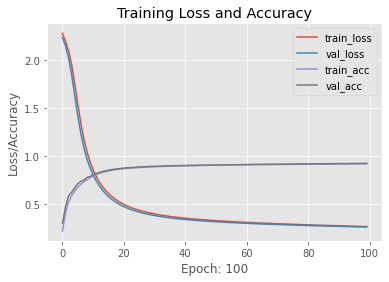

In [15]:
plt.style.use('ggplot')
plt.figure()
plt.plot(np.arange(0, 100), H.history['loss'], label='train_loss')
plt.plot(np.arange(0, 100), H.history['val_loss'], label='val_loss')
plt.plot(np.arange(0,100), H.history['accuracy'], label='train_acc')
plt.plot(np.arange(0,100), H.history['val_accuracy'], label='val_acc')
plt.title('Training Loss and Accuracy')
plt.ylabel('Loss/Accuracy')
plt.xlabel('Epoch: 100')
plt.legend()